## G4Bench benchmark results
Geant4 : v10.7.1 Sequencial-mode

In [5]:
import pandas
import json
import os

In [6]:
data_dir = "./data/10.7.3/"
cpu_list = os.listdir(data_dir)
cpu_list

['ryzen_trpro_3995wx', 'apple_m1', 'xeon_gold_6240', 'epyc_7643', 'i9-12900K']

In [7]:
ecal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
hcal_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_x18_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])
vgeo_e20_df = pandas.DataFrame(columns = ['CPU', 'Time', 'Init', 'TPE', 'EPS', 'SPS', 'Edep'])

### ecal e1000 benchmark

In [8]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/ecal.json", 'r')
    jobj = json.load(json_file)
    ecal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [9]:
ecal_df_sorted = ecal_df.sort_values('SPS')
ecal_df_sorted.reset_index(drop=True, inplace=True)
ecal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,116.7910,1.114280,5.83954,0.172896,752.525,967.384
1,AMD Ryzen Threadripper PRO 3995WX 64-Cores,110.4460,0.986446,5.52228,0.182717,795.269,967.384
2,AMD EPYC 7643 48-Core Processor,102.5020,1.343300,5.12508,0.197710,860.526,967.384
3,Apple M1,66.5840,0.837856,3.32920,0.304200,1324.020,967.384
4,12th Gen Intel(R) Core(TM) i9-12900K,56.6919,0.520120,2.83459,0.356051,1549.700,967.384


In [10]:
import matplotlib.pyplot as plt

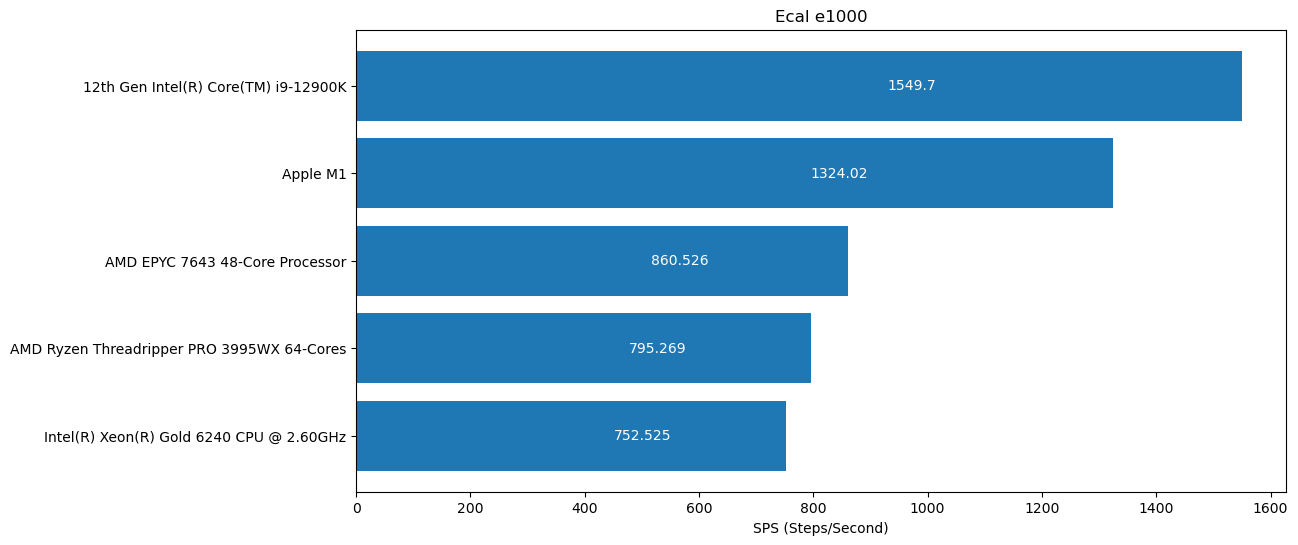

In [11]:
plt.rcdefaults()
fig, ecal_plot = plt.subplots(figsize=(12,6))
ecal_plot.barh(ecal_df_sorted['CPU'], ecal_df_sorted['SPS'], align='center')
ecal_plot.set_title('Ecal e1000')
ecal_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(ecal_df_sorted)
for iy in range(0,nplots) :
  xpos = ecal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, ecal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### hcal p10 benchmark

In [12]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/hcal.json", 'r')
    jobj = json.load(json_file)
    hcal_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [13]:
hcal_df_sorted = hcal_df.sort_values('SPS')
hcal_df_sorted.reset_index(drop=True, inplace=True)
hcal_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,134.2850,1.250550,33.5713,0.030067,459.346,839.368
1,AMD Ryzen Threadripper PRO 3995WX 64-Cores,129.3050,1.120910,32.3263,0.031205,476.727,839.368
2,AMD EPYC 7643 48-Core Processor,123.1770,0.989298,30.7942,0.032737,500.124,839.368
3,Apple M1,72.2961,0.845610,18.0740,0.055983,855.650,839.238
4,12th Gen Intel(R) Core(TM) i9-12900K,61.5838,0.562633,15.3959,0.065551,1001.440,839.368


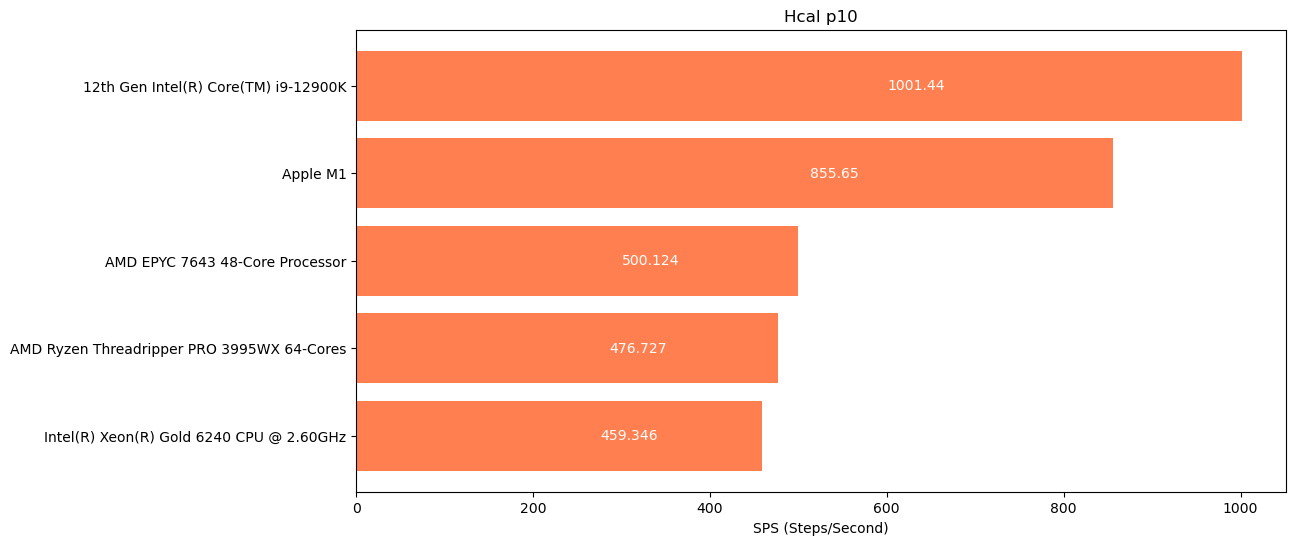

In [14]:
plt.rcdefaults()
fig, hcal_plot = plt.subplots(figsize=(12,6))
hcal_plot.barh(hcal_df_sorted['CPU'], hcal_df_sorted['SPS'], align='center', color='coral')
hcal_plot.set_title('Hcal p10')
hcal_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(hcal_df_sorted)
for iy in range(0,nplots) :
  xpos = hcal_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, hcal_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo x18 benchmark

In [15]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_x18.json", 'r')
    jobj = json.load(json_file)
    vgeo_x18_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [16]:
vgeo_x18_df_sorted = vgeo_x18_df.sort_values('SPS')
vgeo_x18_df_sorted.reset_index(drop=True, inplace=True)
vgeo_x18_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,92.9423,0.495190,0.185885,5.40850,1115.93,1.90087
1,AMD Ryzen Threadripper PRO 3995WX 64-Cores,86.8979,0.435608,0.173796,5.78287,1193.17,1.90087
2,AMD EPYC 7643 48-Core Processor,83.5222,0.825644,0.167044,6.04620,1247.50,1.90087
3,Apple M1,51.2774,0.286922,0.102555,9.80574,2023.20,1.90087
4,12th Gen Intel(R) Core(TM) i9-12900K,43.6468,0.229839,0.087294,11.51620,2376.13,1.90087


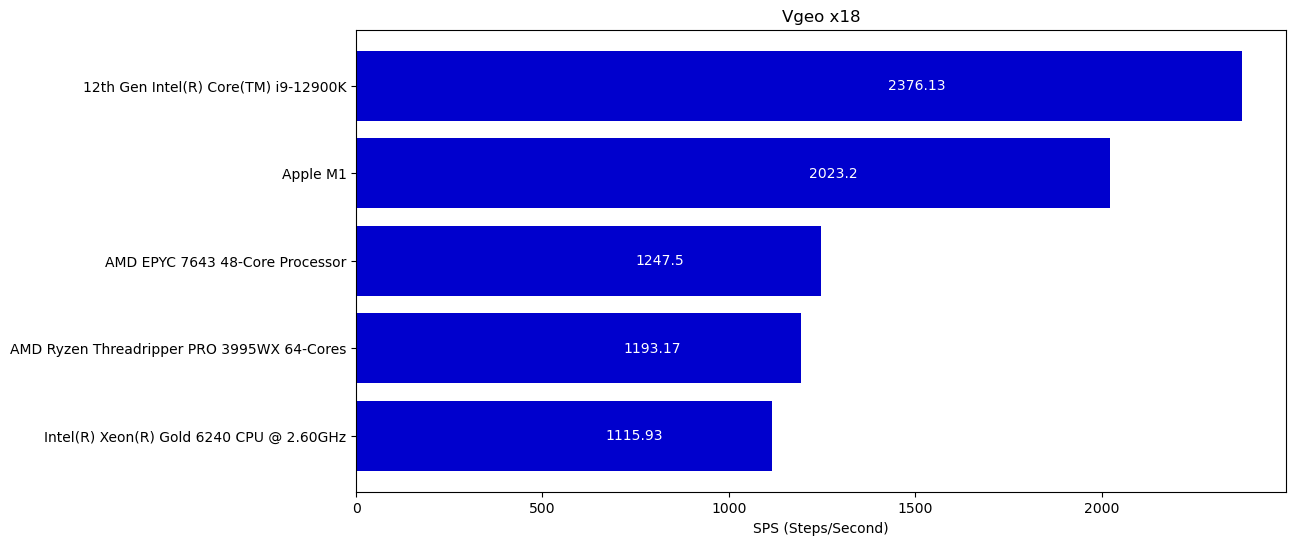

In [17]:
plt.rcdefaults()
fig, x18_plot = plt.subplots(figsize=(12,6))
x18_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_x18_df_sorted['SPS'], align='center', color='mediumblue')
x18_plot.set_title('Vgeo x18')
x18_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(vgeo_x18_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_x18_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_x18_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()

### vgeo e20 benchmark

In [18]:
idata = 0
for cpu in cpu_list:
    json_file = open(data_dir + cpu + "/vgeo_e20.json", 'r')
    jobj = json.load(json_file)
    vgeo_e20_df.loc[idata] = [jobj['cpu'], jobj['time'], jobj['init'], jobj['tpe'], jobj['eps'], jobj['sps'],jobj['edep']]
    idata = idata + 1

In [19]:
vgeo_e20_df_sorted = vgeo_e20_df.sort_values('SPS')
vgeo_e20_df_sorted.reset_index(drop=True, inplace=True)
vgeo_e20_df_sorted

,CPU,Time,Init,TPE,EPS,SPS,Edep
0,Intel(R) Xeon(R) Gold 6240 CPU @ 2.60GHz,92.1980,0.494889,0.460990,2.18095,834.980,18.7489
1,AMD Ryzen Threadripper PRO 3995WX 64-Cores,86.5874,0.435245,0.432937,2.32147,888.779,18.7489
2,AMD EPYC 7643 48-Core Processor,83.8826,0.827261,0.419413,2.40803,921.918,18.7489
3,Apple M1,53.5750,0.286339,0.267875,3.75314,1436.930,18.7491
4,12th Gen Intel(R) Core(TM) i9-12900K,46.1602,0.234197,0.230801,4.35483,1667.250,18.7489


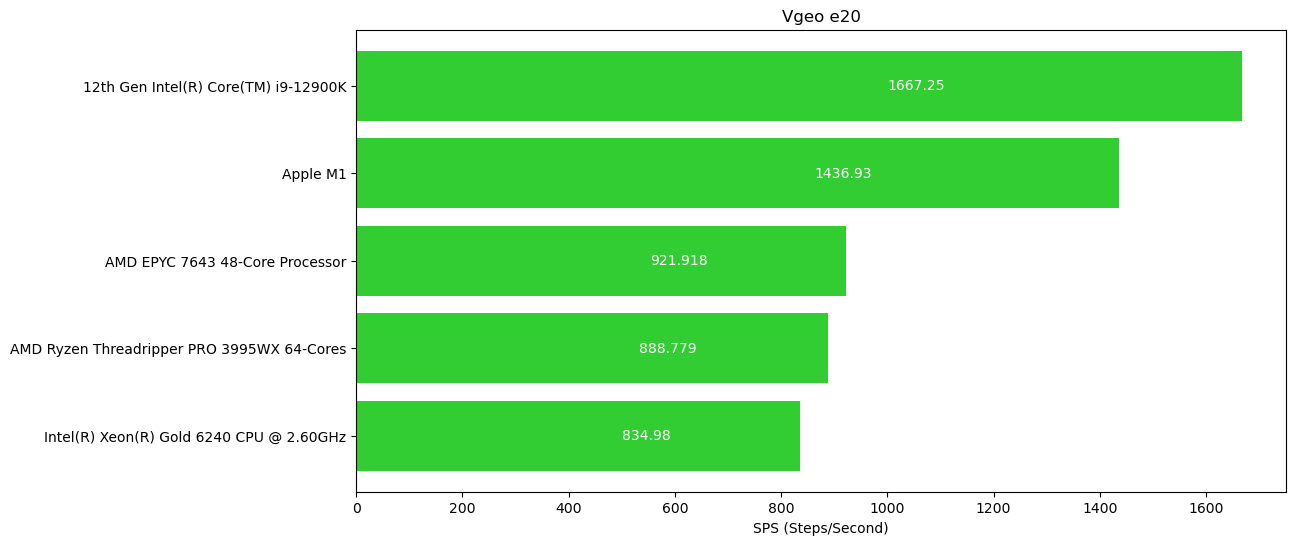

In [20]:
plt.rcdefaults()
fig, e20_plot = plt.subplots(figsize=(12,6))
e20_plot.barh(vgeo_x18_df_sorted['CPU'], vgeo_e20_df_sorted['SPS'], align='center', color='limegreen')
e20_plot.set_title('Vgeo e20')
e20_plot.set_xlabel('SPS (Steps/Second)')
nplots = len(vgeo_e20_df_sorted)
for iy in range(0,nplots) :
  xpos = vgeo_e20_df_sorted['SPS'][iy] * 0.6
  plt.text(xpos, iy, vgeo_e20_df_sorted['SPS'][iy], verticalalignment='center', color='white')
plt.show()